# Lab 2 executable file

This file contains program code, which is a solution to the problems in the file [lab_2_task.txt](https://github.com/RazinAleksandr/M-M-MSA-ITMO/blob/main/Lab_2/lab_2_task.txt)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette(["#C9007A", "#0C5AA6"]))
import numpy as np
from texttable import Texttable
from scipy import stats
from math import inf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics as m 
from sklearn import linear_model
from sklearn.linear_model import  LassoLarsIC

Dataset init

In [2]:
full_df = pd.read_csv('/home/aleksrazin/ITMO/M&MSA/train_data/data.csv')

Features for analysis

In [3]:
df = full_df[ [
    'steroid',
    'systolic_blood_pressure', 
    'diastolic_blood_pressure', 
    'heart_rate',
    'highest_heart_rate',
    'lowest_heart_rate', 
    'lowest_urine_output',
    'highest_ph',
    'hematocrit',
    'platelet_count',
    'potassium',
    'lowest_mean_arterial_pressure',
    'highest_mean_arterial_pressure',
    'temperature'
          ] ]

In [4]:
df.head(10)

,steroid,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,highest_heart_rate,lowest_heart_rate,lowest_urine_output,highest_ph,hematocrit,platelet_count,potassium,lowest_mean_arterial_pressure,highest_mean_arterial_pressure,temperature
0,No,119.0,54.0,79.0,80.0,73.0,700.0,NaN,0.354,116.0,4.1,85.0,85.0,37.2
1,Yes,133.0,64.0,73.0,73.0,69.0,1351.0,NaN,0.359,117.0,3.7,NaN,NaN,37.1
2,Yes,140.0,74.0,70.0,72.0,65.0,1420.0,NaN,0.372,145.0,4.0,NaN,NaN,37.5
3,Yes,154.0,78.0,77.0,80.0,72.0,350.0,NaN,0.383,218.0,3.9,NaN,NaN,37.1
4,Yes,155.0,61.0,64.0,77.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7
5,Yes,156.0,74.0,62.0,71.0,62.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,36.9
6,Yes,158.0,69.0,81.0,81.0,76.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,36.5
7,No,155.0,68.0,104.0,108.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
8,Yes,122.0,80.0,72.0,92.0,72.0,NaN,NaN,0.369,251.0,NaN,NaN,NaN,36.3
9,Yes,114.0,72.0,60.0,67.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9


## Used variables explanation

Here is a very brief summary of the values used. Details are contained in the [README.md](https://github.com/RazinAleksandr/M-M-MSA-ITMO/blob/main/Datasets/README.md) file in the datasets folder.

1. Steroid - uses steroids or not
2. Systolic_blood_pressure - measures the pressure in your arteries when your heart beats
3. Diastolic_blood_pressure - measures the pressure in your arteries when your heart rests between beats
4. Heart_rate - frequency of the heartbeat measured by the number of contractions (beats) of the heart per minute
5. Highest_heart_rate
6. lowest_urine_output - oliguria is the medical term for low urine output
7. Highest_ph
8. Hematocrit - volume percentage of red blood cells in blood
9. Platelet_count - the smallest of our blood cells
10. Potassium - chemical element with the symbol K
11. Lowest_mean_arterial_pressure -
12. Highest_mean_arterial_pressure - 
13. Temperature

## Exercise №1

You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV).

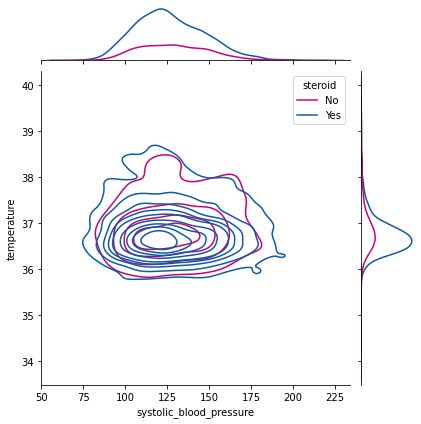

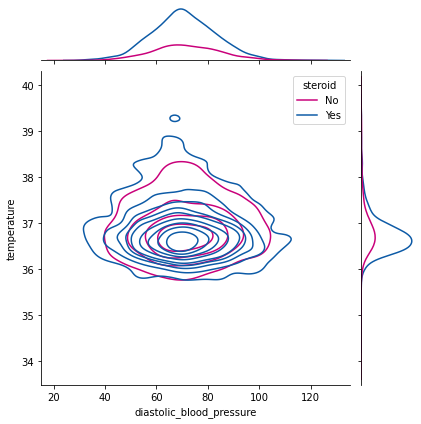

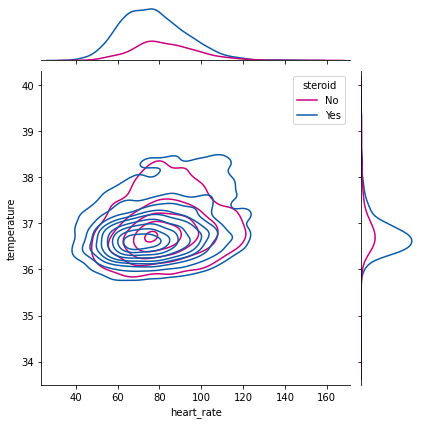

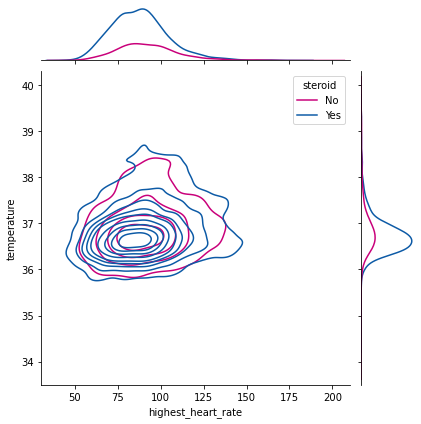

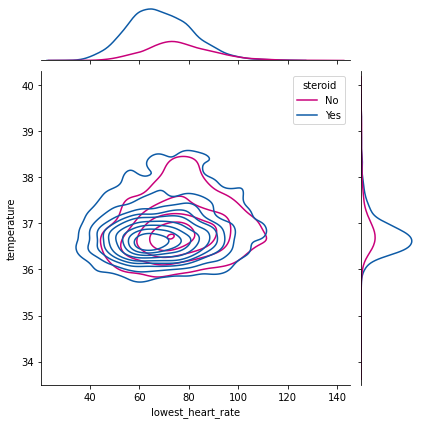

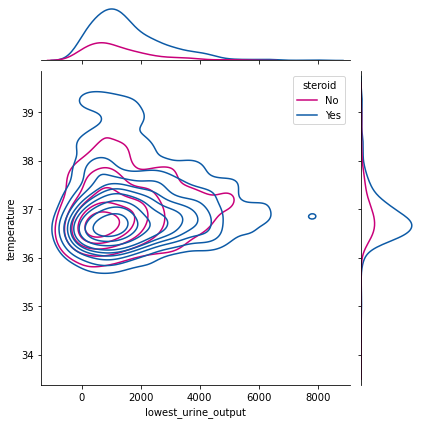

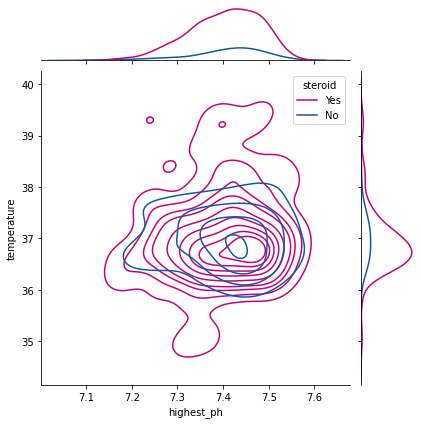

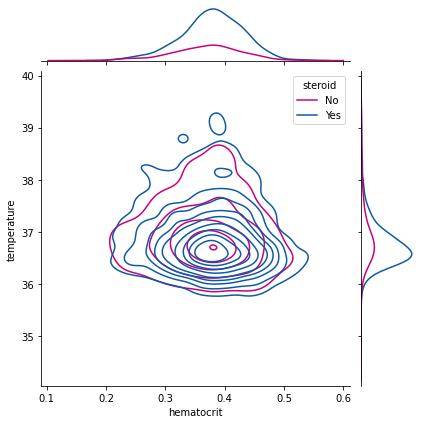

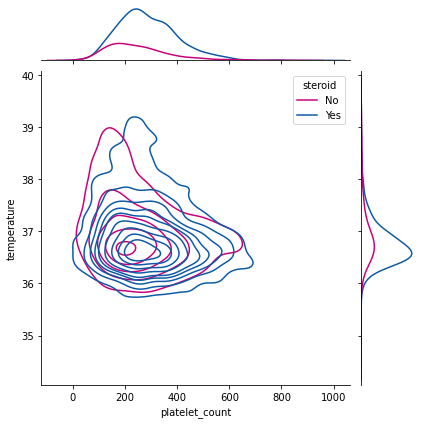

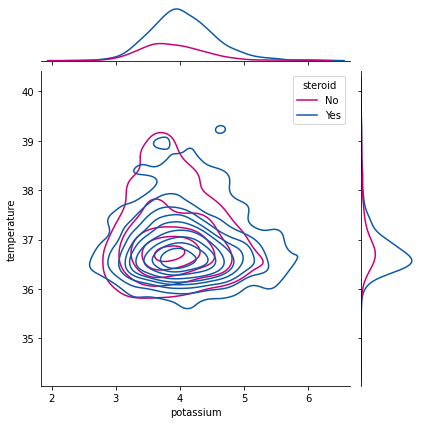

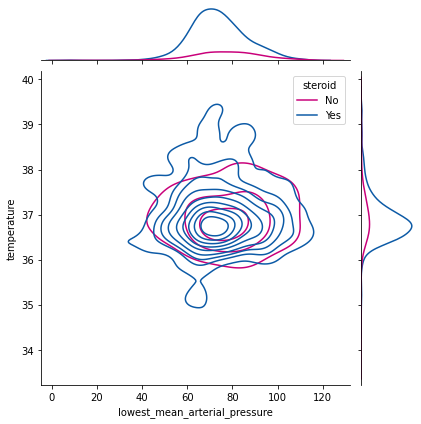

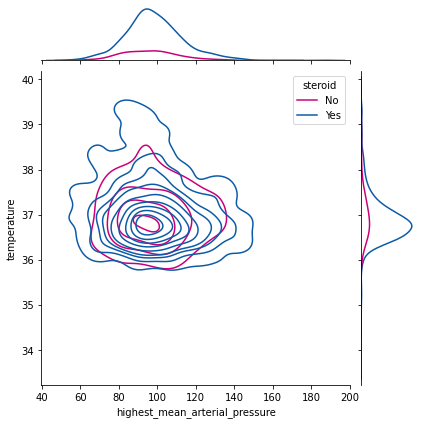

In [7]:
cols = df.columns.to_list()[1:-1]
for col in cols:
    sns.jointplot(data=df, x=col, y='temperature', hue='steroid', kind='kde', dropna=True)

## Exercise №2

You need to make an estimation of multivariate mathematical expectation and variance.

In [8]:
t = Texttable()

title = [ ['Column name', 'mathematical expectation', 'variance'] ]
rows = [ [col, df.loc[:, col].mean(), df.loc[:, col].var()] for col in df.columns[1:] ]
title.extend(rows)

t.set_deco(Texttable.HEADER)
t.set_cols_align(["l", "r", "r"])
t.add_rows(title)

print(t.draw())

         Column name             mathematical expectation    variance  
systolic_blood_pressure                           127.378       426.906
diastolic_blood_pressure                           71.074       161.892
heart_rate                                         78.755       243.792
highest_heart_rate                                 88.972       294.274
lowest_heart_rate                                  70.692       183.380
lowest_urine_output                              1513.093   1512313.740
highest_ph                                          7.404         0.006
hematocrit                                          0.376         0.003
platelet_count                                    279.154     14103.923
potassium                                           4.013         0.256
lowest_mean_arterial_pressure                      74.460       169.481
highest_mean_arterial_pressure                     98.091       230.062
temperature                                        36.800       

## Exercise №3

You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

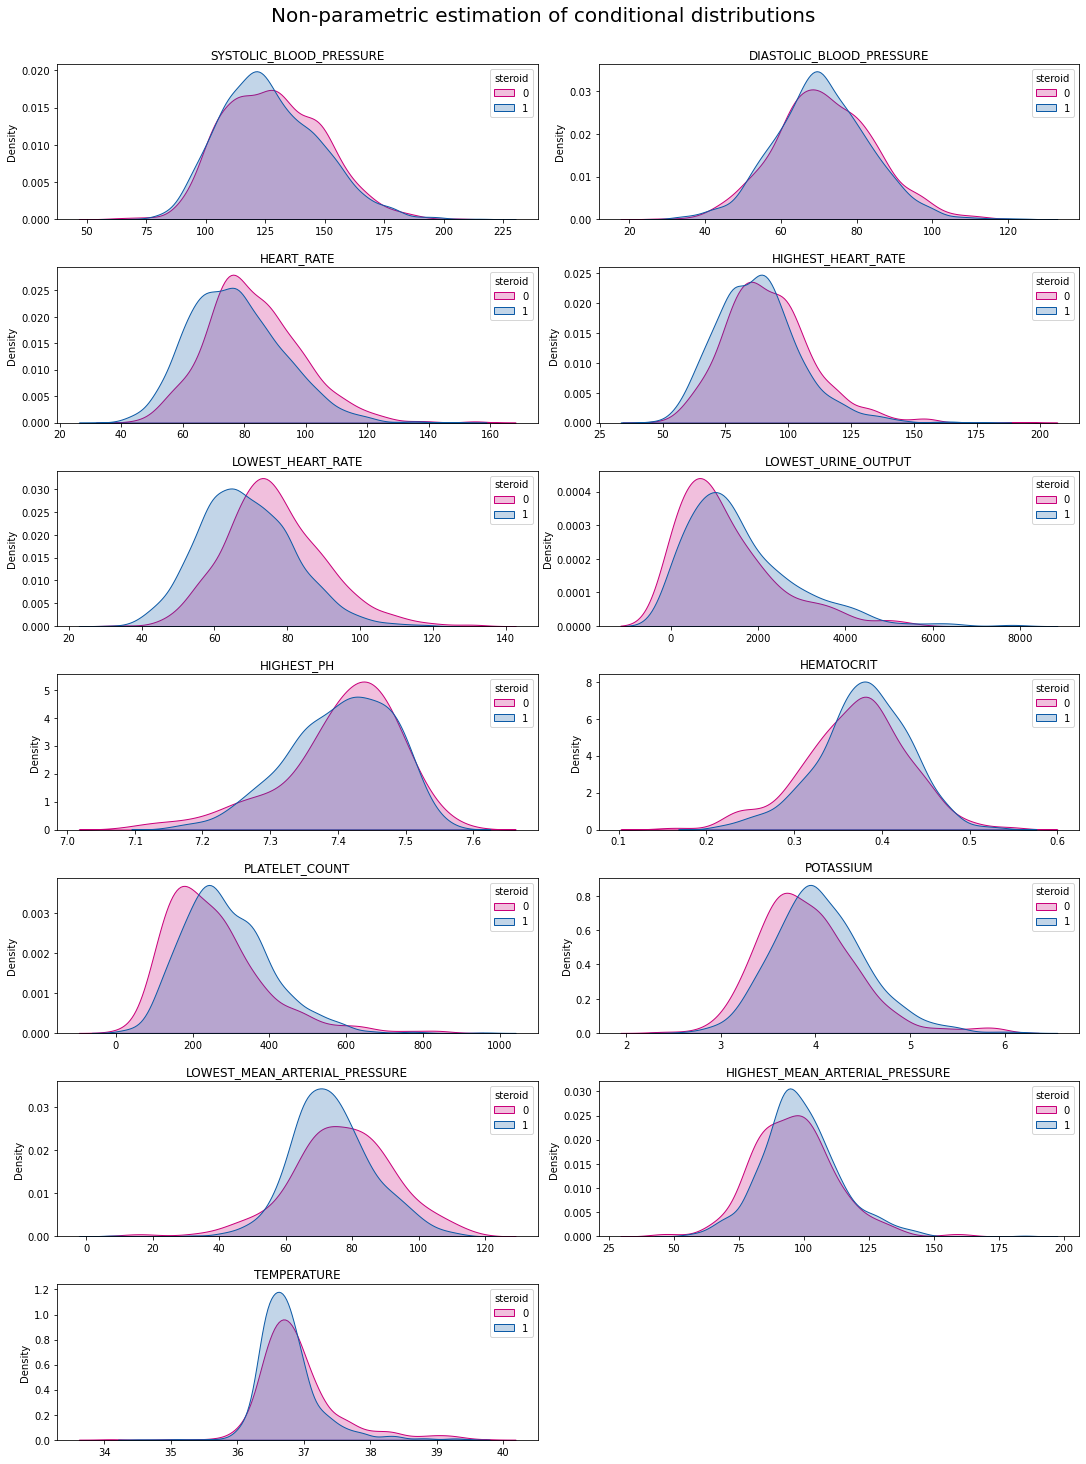

In [9]:
plt.figure(figsize=(15,20))
plt.suptitle("Non-parametric estimation of conditional distributions", fontsize=20, y=1.01)

num_columns = len(df.columns[1:])
for n, col in enumerate(df.columns[1:]):
    ax = plt.subplot(num_columns // 2 if num_columns % 2 == 0 else num_columns // 2 + 1, 2, n + 1)
    
    sns.kdeplot(df.loc[df['steroid'] == 'No', col], 
                shade=True, 
                label='0', 
                warn_singular=False, 
                ax=ax)
    sns.kdeplot(df.loc[df['steroid'] == 'Yes', col], 
                shade=True, 
                label="1",
                warn_singular=False,
                ax=ax)
    
    ax.legend(title='steroid', loc='upper right')
    ax.set_title(col.upper(), fontsize=12, color='black')
    ax.set(xlabel=None)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)

In [10]:
df.groupby('steroid').agg({
    'mean', 'std'
}).T

steroid                                       No          Yes
systolic_blood_pressure        mean   128.534766   126.979983
                               std     20.597861    20.673142
diastolic_blood_pressure       mean    71.683944    70.864230
                               std     13.094254    12.589663
heart_rate                     mean    83.210593    77.227410
                               std     15.500808    15.360945
highest_heart_rate             mean    92.288777    87.834847
                               std     17.736884    16.803939
lowest_heart_rate              mean    76.480454    68.707307
                               std     13.588559    12.945702
lowest_urine_output            mean  1267.104265  1590.910045
                               std   1112.684338  1255.318104
highest_ph                     mean     7.405789     7.403398
                               std      0.084260     0.076234
hematocrit                     mean     0.368917     0.378634
                               std      0.059671     0.052433
platelet_count                 mean   252.843318   287.910276
                               std    127.373787   114.467865
potassium                      mean     3.912045     4.048889
                               std      0.519694     0.496300
lowest_mean_arterial_pressure  mean    77.014085    73.880000
                               std     15.415745    12.350257
highest_mean_arterial_pressure mean    96.098592    98.544000
                               std     15.700797    15.020128
temperature                    mean    36.915696    36.760164
                               std      0.616056     0.467212

## Exercise №4

You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [12]:
stat_df = {
    'Feature': [],
    'Corr coefficient': [],
    'Significance level': [],
    'Confidence interval': []
}

clean_df = df.dropna()
for col in df.columns[1:]:
    # Confidence interval for the correlation coefficient
    r, p = stats.pearsonr(clean_df[col].apply(lambda x: float(x)), clean_df.steroid.apply(lambda x: 0 if x == 'No' else 1))
    r_z = np.arctanh(r) # matches Fisher transform
    
    # Corresponding standard deviation
    se = 1/np.sqrt(clean_df[col].size-3)
    alpha = 0.05
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    
    stat_df['Feature'].append(col)
    stat_df['Corr coefficient'].append(round(r, 5))
    stat_df['Significance level'].append(0 if p > 0.05 else 1)
    stat_df['Confidence interval'].append(f'[{lo_z} ... {hi_z}]')
stat_df = pd.DataFrame(stat_df)

In [13]:
stat_df

,Feature,Corr coefficient,Significance level,Confidence interval
0,systolic_blood_pressure,0.04692,0,[-0.0919866665684353 ... 0.18588965965830329]
1,diastolic_blood_pressure,-0.01684,0,[-0.15577884908689754 ... 0.12209747713984104]
2,heart_rate,-0.22242,1,[-0.36514250221551486 ... -0.08726617598877628]
3,highest_heart_rate,-0.18711,1,[-0.328275040842954 ... -0.05039871461621545]
4,lowest_heart_rate,-0.28554,1,[-0.4326427482093862 ... -0.1547664219826476]
5,lowest_urine_output,0.00651,0,[-0.13243232433459837 ... 0.1454440018921402]
6,highest_ph,-0.03069,0,[-0.16963756268982486 ... 0.10823876353691372]
7,hematocrit,-0.07858,0,[-0.217679316784274 ... 0.0601970094424646]
8,platelet_count,0.18356,1,[0.046726560436002346 ... 0.32460288666274095]
9,potassium,0.10723,0,[-0.031294353018923915 ... 0.24658197320781466]


## Exercise №5

Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

/home/aleksrazin/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:title={'center':'Multivariate correlation matrix'}>

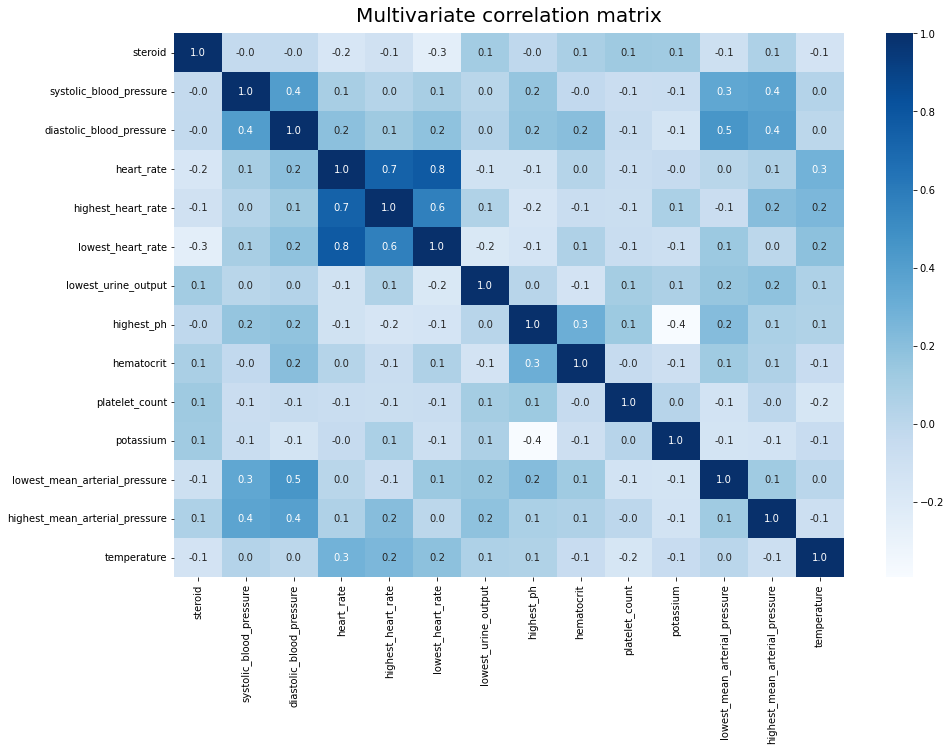

In [7]:
df.steroid = df.steroid.apply(lambda x: 0 if x == 'No' else 1)
plt.figure(figsize=(15, 10))
plt.title('Multivariate correlation matrix', fontsize=20, y=1.01)
sns.heatmap(df.corr(), annot=True, fmt= '.1f', cmap = 'Blues')

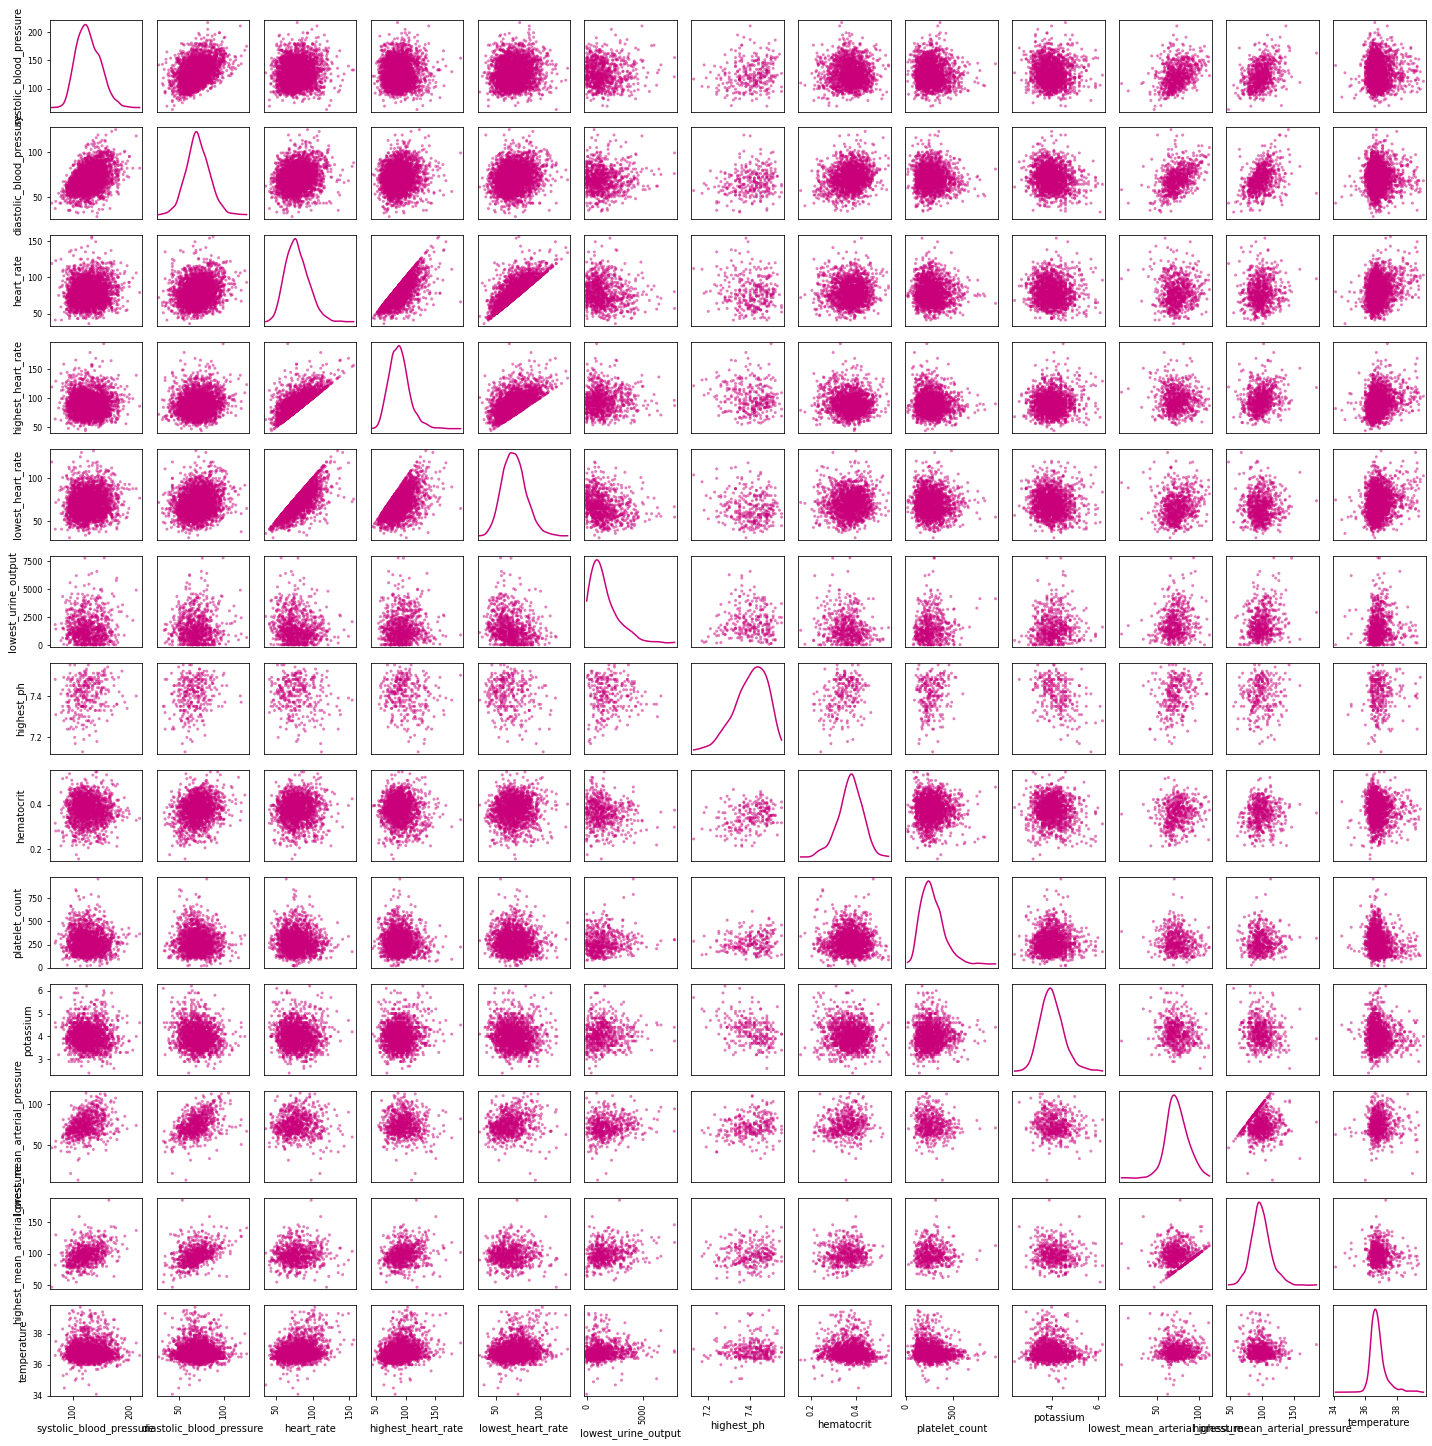

In [492]:
pd.plotting.scatter_matrix(df.iloc[:, 1:], diagonal="kde", figsize=(20,20))
plt.tight_layout()
plt.show()

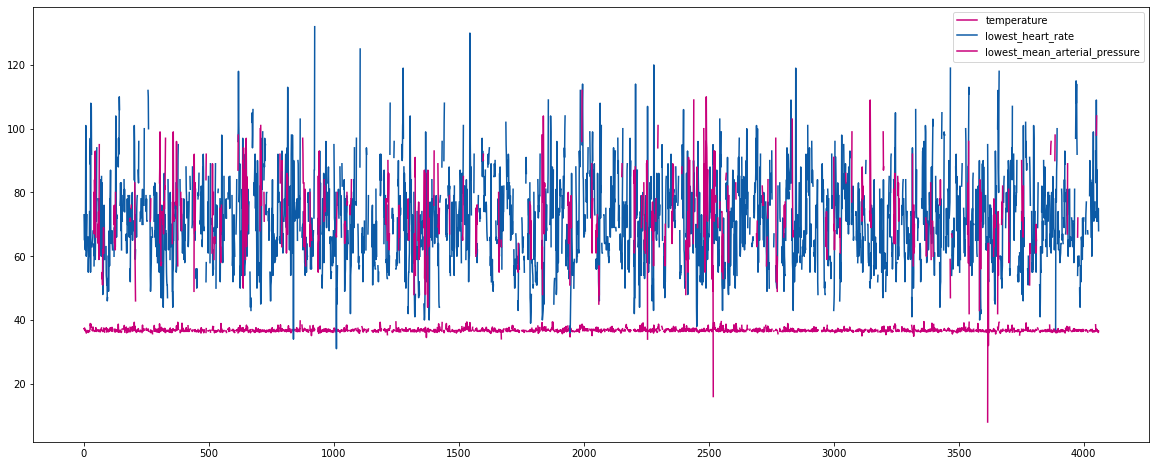

In [441]:
ax = df[['temperature', 'lowest_heart_rate', 'lowest_mean_arterial_pressure']].plot(figsize=(20,8))
ax.legend(loc='upper right')

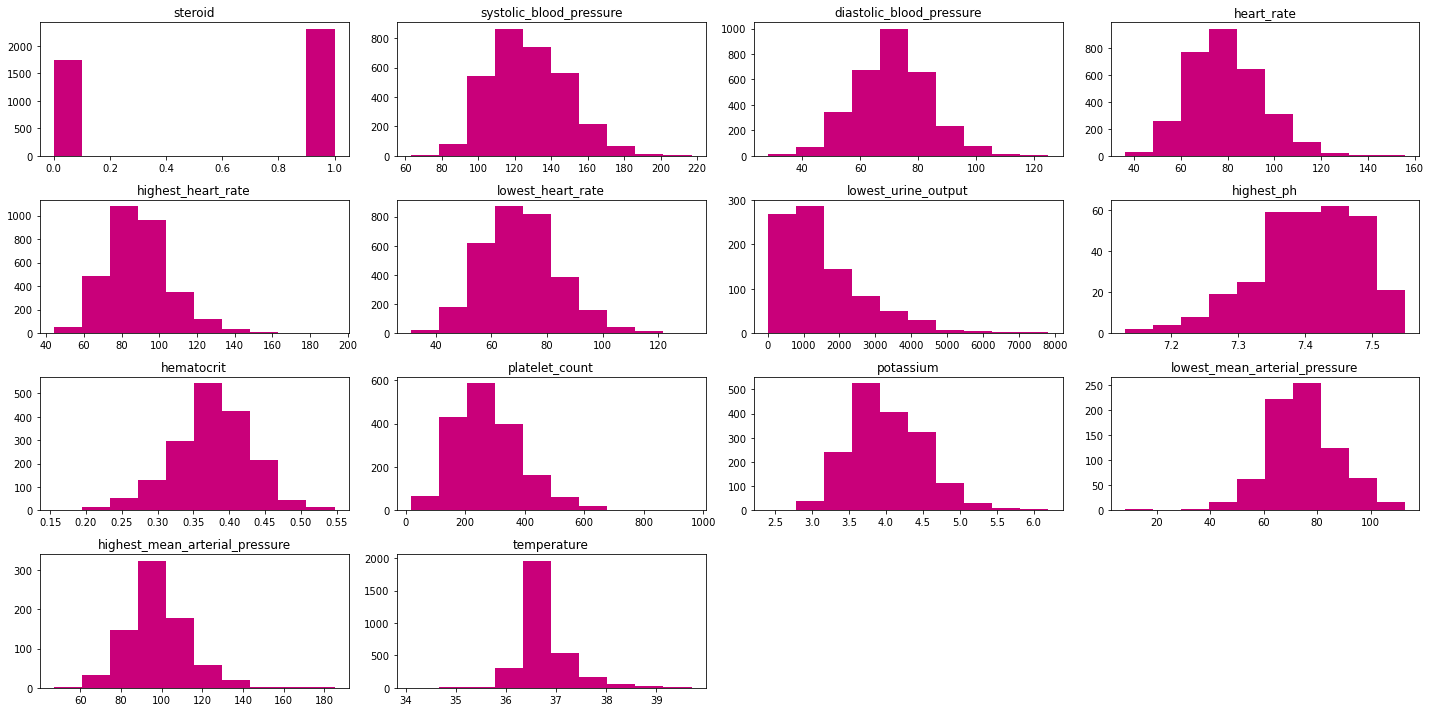

In [639]:
_ = df.hist(sharex=False, sharey=False, grid=False, figsize=(20,10))
plt.tight_layout()

In [24]:
# Some data cleaning
df.dropna(thresh=2000, axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

X = df.drop(['diastolic_blood_pressure'], axis=1)
y = df['diastolic_blood_pressure']
scaler = MinMaxScaler()
scaler.fit(X)
standardisedX = scaler.transform(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

/home/aleksrazin/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/aleksrazin/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    print(y)
    x = np.arange(len(y)) + 1
    plt.figure(figsize=(12,8))
    plt.title('PCA', fontsize=20, y=1.01)
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.grid(True)
    plt.ylabel("Variance")
    plt.show()

[0.24620466 0.02938367 0.01353484 0.00610962 0.00462709 0.00225327]


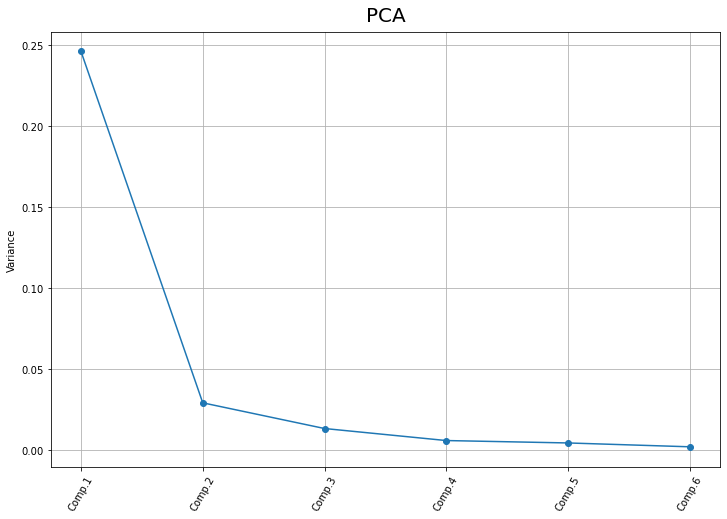

In [26]:
screeplot(pca, standardisedX)

## Exercise №6

Build regression model and make an analysis of multicollinearity and regularization (if needed).

##### Some data preprocessing

In [27]:
to_drop = ['cxr_findings', 'chest_ct_findings', 'head_ct_findings']
full_df.drop(to_drop, axis=1, inplace=True)

full_df.dropna(thresh=2000, axis=1, inplace=True)
full_df.fillna(full_df.mean(), inplace=True)

bool_ = full_df.select_dtypes(include='object').columns.to_list()
for b in bool_:
    full_df[b] = full_df[b].apply(lambda x: 1 if x == 'Yes' else 0)

full_df.drop(['id', 'parent_id'], axis=1, inplace=True)

KeyError: "['cxr_findings' 'chest_ct_findings' 'head_ct_findings'] not found in axis"

In [15]:
full_df

,day,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,highest_heart_rate,lowest_heart_rate,highest_creatinine,...,renal_replacement_therapy_dialysis,cardiovascular_mechanical_support,serum_creatinine,echocardiogram,chest_x_ray,chest_ct,head_ct,antimicrobial,anticoagulation,steroid
0,1,119.000000,54.000000,79.00000,18.00000,94.000000,37.200000,80.00000,73.000000,102.000000,...,0,0,102.000000,0,0,0,0,1,1,0
1,2,133.000000,64.000000,73.00000,18.00000,98.000000,37.100000,73.00000,69.000000,88.000000,...,0,0,88.000000,0,0,0,0,1,1,1
2,3,140.000000,74.000000,70.00000,20.00000,95.000000,37.500000,72.00000,65.000000,73.000000,...,0,0,73.000000,0,0,0,0,1,1,1
3,4,154.000000,78.000000,77.00000,18.00000,95.000000,37.100000,80.00000,72.000000,85.000000,...,0,0,85.000000,0,1,0,0,1,1,1
4,5,155.000000,61.000000,64.00000,16.00000,92.000000,36.700000,77.00000,64.000000,100.449851,...,0,0,99.593347,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,4,98.000000,73.000000,82.00000,24.00000,95.000000,36.100000,82.00000,75.000000,100.449851,...,0,0,99.593347,0,0,0,0,1,1,0
4060,5,110.000000,64.000000,68.00000,18.00000,95.000000,36.500000,75.00000,68.000000,100.449851,...,0,0,99.593347,0,0,0,0,1,1,0
4061,6,127.378116,71.074134,78.75499,20.79768,94.054411,36.799774,88.97199,70.691887,100.449851,...,0,0,99.593347,0,0,0,0,0,0,0
4062,7,127.378116,71.074134,78.75499,20.79768,94.054411,36.799774,88.97199,70.691887,100.449851,...,0,0,99.593347,0,0,0,0,0,0,0


##### Regression task

In [36]:
X = full_df.drop(['diastolic_blood_pressure'], axis=1)
y = full_df['diastolic_blood_pressure']
scaler = StandardScaler()
scaler.fit(X)
standardisedX = scaler.transform(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [37]:
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(standardisedX, y, test_size=0.2, random_state=42)

In [38]:
# Create a linear regression model
reg = LinearRegression()
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

row1 = [ ['Least Squares model', '-', str(mse), str(mae), str(r2), str(reg.coef_)] ]

print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('R2 score = ', r2)

Mean absolute error =  6.270710090781282
Mean squared error =  84.23118903206688
R2 score =  0.23881320059472277


In [39]:
# Lasso regularization
l_A = -1
l_MSE = inf
l_MAE = inf
l_var = -1
l_coef = (0, 0, 0, 0, 0, 0)

for alpha in np.arange(0.0,1.001,0.001):    
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    l_coef = clf.coef_
    if mse < l_MSE and r2 > l_var:
        l_A = alpha
        l_MSE = mse
        l_MAE = mae
        l_var = r2
        l_coef = l_coef

row2 = [ ['Best Lasso model', str(l_A), str(l_MSE), str(l_MAE), str(l_var), str(l_coef)] ]

print('Mean absolute error = ', l_MAE)
print('Mean squared error = ', l_MSE)
print('R2 score = ', l_var)

/tmp/ipykernel_342608/1142311879.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_train, y_train)
/home/aleksrazin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/aleksrazin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160316.04966932535, tolerance: 40.98302938607162
  model = cd_fast.enet_coordinate_descent(
/home/aleksrazin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706.7400294307736, tolerance: 4

Mean absolute error =  6.235347687129303
Mean squared error =  84.17037968064292
R2 score =  0.23936272715508855


In [41]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)

# Forecast on a test sample
y_pred_lasso_aic = model_aic.predict(X_test)
params = np.append(model_aic.intercept_, model_aic.coef_)
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_lasso_aic)
mse = mean_squared_error(y_test, y_pred_lasso_aic)
r2 = r2_score(y_test, y_pred_lasso_aic)

row3 = [ ['LassoLarsIC', '-', str(mse), str(mae), str(r2), str(model_aic.coef_)] ]

print('Mean absolute error with aic lasso = ', mae)
print('Mean squared error with aic lasso = ', mse)
print('R2 score with aic lasso = ', r2)

Mean absolute error with aic lasso =  6.216685773686798
Mean squared error with aic lasso =  84.35591843585016
R2 score with aic lasso =  0.23768603645577924


/home/aleksrazin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=1.170e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/aleksrazin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 27 iterations, i.e. alpha=4.816e-06, with an active set of 25 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


In [65]:
t = Texttable()
title = [ ['Type', 'Alpha', 'MSE', 'MAE', 'VAR'] ]

for row in [row1, row2, row3]:
    title.extend([row[0][:-1]])
t.set_cols_align(['l', 'c', 'c', 'c', 'c'])
t.add_rows(title)

print(t.draw())

+---------------------+-------+--------+-------+-------+
|        Type         | Alpha |  MSE   |  MAE  |  VAR  |
+=====================+=======+========+=======+=======+
| Least Squares model |   -   | 84.231 | 6.271 | 0.239 |
+---------------------+-------+--------+-------+-------+
| Best Lasso model    | 0.058 | 84.170 | 6.235 | 0.239 |
+---------------------+-------+--------+-------+-------+
| LassoLarsIC         |   -   | 84.356 | 6.217 | 0.238 |
+---------------------+-------+--------+-------+-------+


Text(0, 0.5, 'Temp')

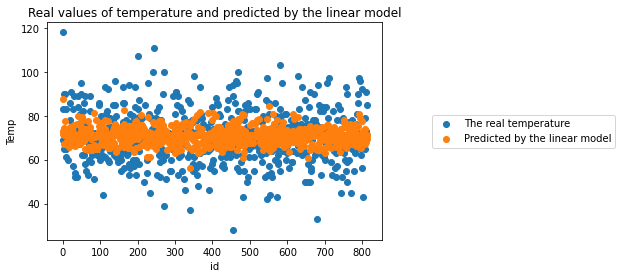

In [43]:
x = []
for i in range(len(y_test)):
    x.append(i)

#graph of real and predicted values
plt.scatter(x, y_test, label = u'The real temperature')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of temperature and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'id')
plt.ylabel(u'Temp')

##### Classification task

In [49]:
X = full_df.drop(['steroid'], axis=1)
y = full_df['steroid']
scaler = StandardScaler()
scaler.fit(X)
standardisedX = scaler.transform(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [50]:
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(standardisedX, y, test_size=0.2, random_state=42)

In [51]:
#train the logistic regression model
cls = LogisticRegression()
cls =cls.fit(X_train,y_train)
# predict labels on the test sample
y_out = cls.predict(X_test)
# calculate the corresponding probabilities
y_out_proba = cls.predict_proba(X_test)

In [52]:
# calculate metrics
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = m.roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)

print('accuracy', accuracy )
print('precision', precision )
print('recall', recall )
print('roc_auc', roc_auc )
print('F1-score', f1_score )

accuracy 0.8388683886838868
precision 0.8038095238095239
recall 0.9377777777777778
roc_auc 0.8532936507936508
F1-score 0.8656410256410257


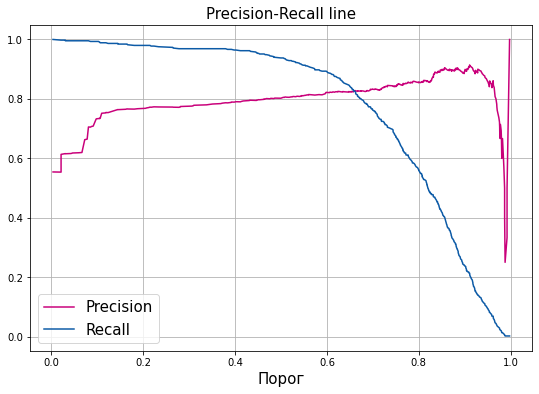

In [55]:
# build a graph for precision and recall with different binarization thresholds
prec, rec, thresh = m.precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Порог",fontsize = 15)
plt.title(u'Precision-Recall line',fontsize = 15)
plt.legend(fontsize = 15)

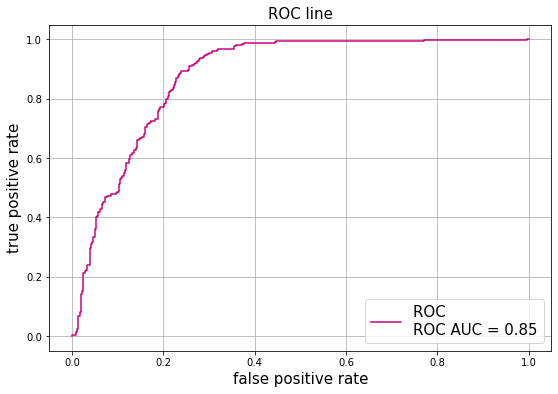

In [56]:
# строим график для ROC-кривой
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC line",fontsize = 15)
plt.legend(fontsize = 15)

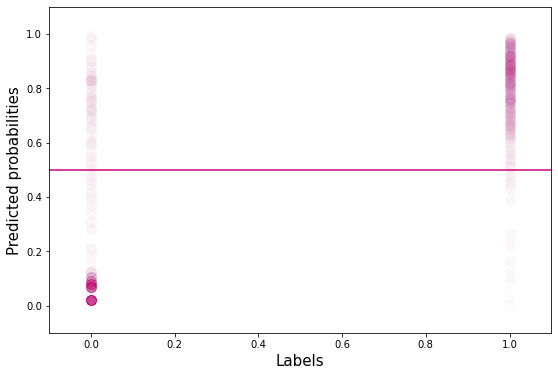

In [57]:
# look at the probability distribution
def scatter(actual, predicted, T):
    plt.figure(figsize = (9,6))
    plt.scatter(actual, predicted,s=100,alpha = 0.01)
    plt.xlabel(u"Labels",fontsize = 15)
    plt.ylabel(u"Predicted probabilities",fontsize = 15)
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
scatter(y_test,y_out_proba[:,1],0.5)

## Exercise №7

Analyze the quality of regression model (distribution of residuals, determination coefficient).

In [46]:
from prettytable import PrettyTable
import scipy as sp
import pylab

In [47]:
X = full_df.drop(['diastolic_blood_pressure'], axis=1)
y = full_df['diastolic_blood_pressure']
scaler = StandardScaler()
scaler.fit(X)
standardisedX = scaler.transform(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(standardisedX, y, test_size=0.2, random_state=42)

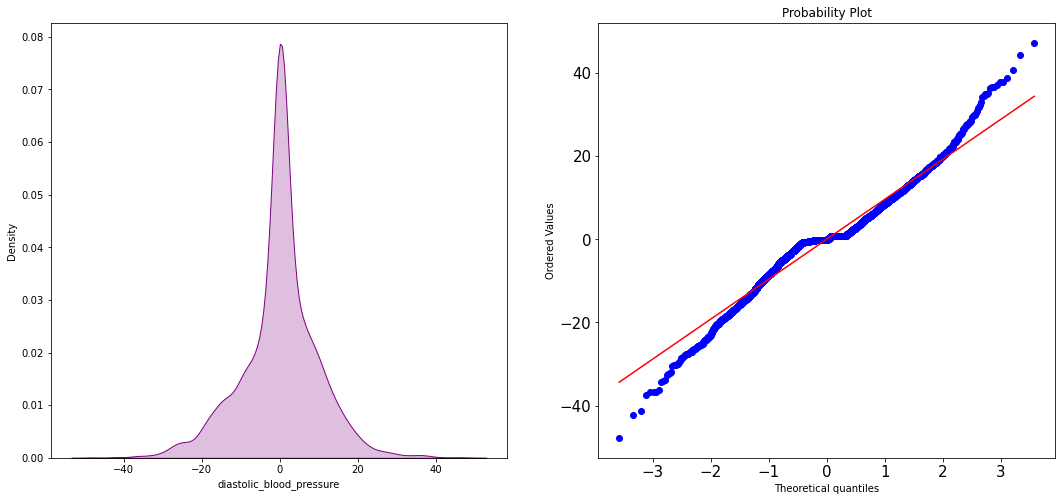

Statistic: 70.607
+------+-------+----------------------------------------------+
|  SL  |   CV  |                      H0                      |
+------+-------+----------------------------------------------+
| 15.0 | 0.575 | data doesn't look normal (fail to reject H0) |
| 10.0 | 0.655 | data doesn't look normal (fail to reject H0) |
| 5.0  | 0.786 | data doesn't look normal (fail to reject H0) |
| 2.5  | 0.917 | data doesn't look normal (fail to reject H0) |
| 1.0  | 1.091 | data doesn't look normal (fail to reject H0) |
+------+-------+----------------------------------------------+
KstestResult(statistic=0.39490478262197626, pvalue=0.0)
Residuals are not distributed normally


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

residuals = full_df['diastolic_blood_pressure'] - model.predict(standardisedX)
residuals.describe()
table = PrettyTable()
table.field_names = ["SL", "CV", 'H0']

result = sp.stats.anderson(residuals, dist='norm')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        table.add_row([sl, cv, 'data looks normal (fail to reject H0)'])
    else:
        table.add_row([sl, cv, "data doesn't look normal (fail to reject H0)"])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  
sns.kdeplot(residuals, shade=True, color='purple', ax=axes[0])
sp.stats.probplot(residuals, dist="norm", plot=axes[1])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
pylab.show()

print('Statistic: %.3f' % result.statistic)
print(table)

ks = sp.stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.var())) 
print(ks)
if ks[1]==0:
    print('Residuals are not distributed normally')